<a href="https://colab.research.google.com/github/apal5/cs575_hw5.1/blob/main/CS575_HW5_apal5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requires
1.   [matplotlib](https://matplotlib.org/): a visualization library
2.   [numpy](https://numpy.org/): a numerical / scientific library

### Easy mode
Grab the awesome but large anaconda distribution which includes everything you will need [here](https://www.anaconda.com/products/distribution).

In [19]:
import time
import math
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

## Caution
You are not allowed to import any other libraries

In [20]:
size = 10000
num_instances = 1000

# Inputs, Outputs, I/O

In [22]:
## create files

def makeInputs(size, low=0, high=1000000, num_instances=100):
  """
  Generate <num_instances> instances of the sorting problem, 
  each with <size> number of integers,
  and saves them.
  Instance <i> with <size> integers is stored as 
  filename 'instance_<size>_<i>'
  """
  for i in range(num_instances):
    instance = makeInstance(low=low, high=high, size=size)
    with open(f'instance_{size}_{i}.txt', 'w') as f:
      f.writelines(" ".join(str(i) for i in instance))

def makeInstance(size, low=0, high=1000000):
  """
  Generate a list of <size> integers selected uniformly at random 
  from the integers between <low> and <high>
  """
  lst = np.random.randint(low=low, high=high, size=size).tolist()
  return lst


"""
TODO: Write functions to read the input files
"""
def readInput(filename):
  content = ""
  with open(filename) as f:
    content += f.readline()
  lst = list(map(int,content.split(" ")))
  return lst

# Creating data

In [26]:
makeInputs(size,num_instances=num_instances)

## TODO
Create 100 inputs of each size 100, 200, ..., 10,000

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implement Sorting Algorithms

## Implement Merge Sort

In [37]:
def mergeSort(lst):
  '''TODO: Implement the Merge Sort algorithm'''
  if len(lst)>1:
    a=lst[:len(lst)//2]
    b=lst[len(lst)//2:]
    a=mergeSort(a)
    b=mergeSort(b)
    return merge(a,b)
  else: 
    return lst    

In [38]:
def merge(list1, list2):
  if not list2 or len(list2)== 0:
    return list1
  elif not list1 or len(list1)== 0:
    return list2
  else:
    i=0
    j=0
    k=0
    merged = list1+list2
    while i<len(list1) and j<len(list2):
      if list1[i]<=list2[j]:
        merged[k]=list1[i]
        i+=1
        k+=1
      else:
        merged[k]=list2[j]
        j+=1
        k+=1
    if(i<len(list1)):
      while (i<len(list1)):
        merged[k]=list1[i]
        k+=1
        i+=1
    if(j<len(list2)):
      while(j<len(list2)):
        merged[k]=list2[j]
        k+=1
        j+=1               
  return merged

In [39]:
mergeSort(x)==sorted(x)

True

## Implement Quick Sort

In [32]:
def quickSort(lst):
  '''TODO: Implement the Quick Sort algorithm'''
  return quickSortFunction(lst,0,len(lst)-1)

def quickSortFunction(lst, low, high):
  if(low<high):
    pivot=partition(lst, low, high)
    quickSortFunction(lst, low, pivot-1)
    quickSortFunction(lst, pivot+1, high)
  return lst
  
def partition(lst, low, high):
  piv=lst[high]
  i=low-1

  for j in range (low, high):
    if lst[j]<=piv:
      i+=1
      lst[i],lst[j]=lst[j], lst[i] #Swap
  lst[i+1], lst[high]=lst[high], lst[i+1]
  return i+1
      

In [33]:
def readAllData():
  data = []
  for i in range(num_instances):
    filename = f'instance_{size}_{i}.txt'
    data.append(readInput(filename))
  return data

In [34]:
data = readAllData()
for i,x in enumerate(data):
  if quickSort(x)!=sorted(x):
    print("Sorting Failed for instance: ",i)

# Experiments

## Run experiments as a batch

In [40]:
def sortRun(data, sort):
  """
  TODO: Measure the running time of the function <sort> on inputs <data>
  Inputs:
    data: a list consisting of lists, each of which is an unsorted list of numbers
    sort: a function that takes a list of unsorted numbers as input 
          e.g. your implementations of merge sort and quick sort
  Output:
    a list of running times, each element is the running time of the function sort 
    on the corresponding list in data
  """
  times = []
  
  for lst in data: 
    start_time = time.time()
    sort(lst)
    runtime = (time.time() - start_time)
    times.append(runtime)
  return times

In [41]:
"""
Example
"""
data = readAllData()
points_m = sortRun(data, mergeSort)
points_q = sortRun(data, quickSort)

## TODO
Run Experiments and Gather Data

# Example data and graph

In [42]:
points = [i+1 for i in range(len(data))]
ym_val = [i for i in points_m]
yq_val = [i for i in points_q]

## TODO

Plot the running times of the two algorithms together with their 95% confidence intervals. You may find [this](https://en.wikipedia.org/wiki/Confidence_interval) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) helpful. 

Note both curves, one for each algorithm and their confidence intervals must appear on the same plot. 

You may use red for Merge Sort and blue for Quick Sort. For each of these, a shaded region showing the 95% confidence interval for each of these must be filled with the same color at 50% of lower transparency.

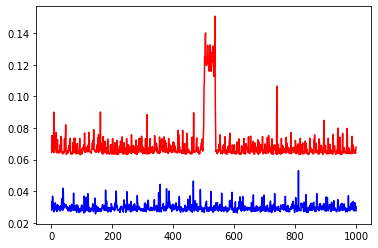

In [44]:
plt.plot(points,ym_val,color='r')
plt.plot(points,yq_val,color='b')
plt.show()


## implement your functions, then plot the results